In [1]:
import numpy as np 
import pandas as pd
from pylab import plt,mpl
np.random.seed(100)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300;
mpl.rcParams['font.family'] = 'serif';


In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'


In [10]:
raw = pd.read_csv(url,index_col = 0, parse_dates = True)['EUR=']

In [11]:
raw.head()

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
Name: EUR=, dtype: float64

In [12]:
raw.tail()

Date
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, dtype: float64

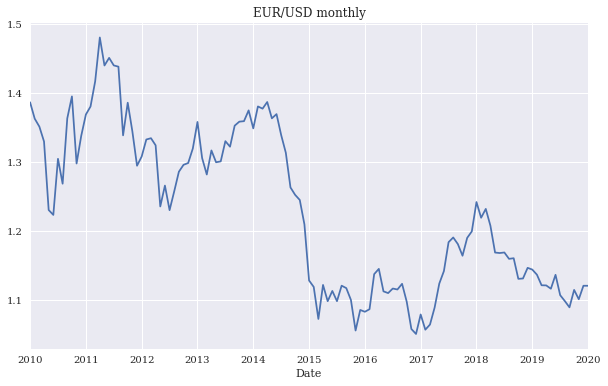

In [14]:
l = raw.resample('1M').last() # resample function in pandas
l.plot(figsize = (10,6),title = 'EUR/USD monthly')

Text(0, 0.5, 'labels')

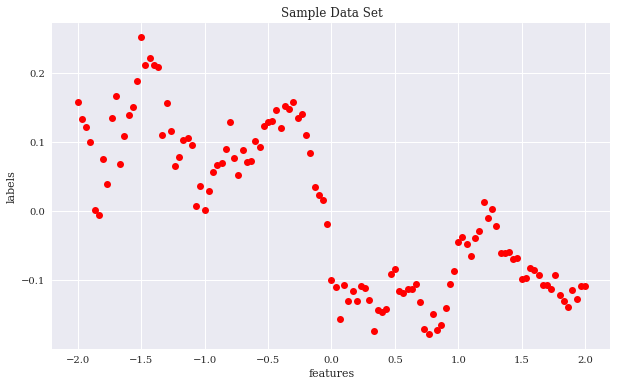

In [19]:
l = l.values
l -= l.mean()

f = np.linspace(-2,2,len(l)) # synthetic feature as an ndarray object

plt.figure(figsize = (10,6))
plt.plot(f,l,'ro')    
plt.title('Sample Data Set')
plt.xlabel('features')
plt.ylabel('labels')

In [25]:
def mse(l,p):
    return np.mean((l-p)**2)

reg = np.polyfit(f,l,deg =5)
p = np.polyval(reg,f)
mse(l,p) # mean squared error estimate

0.003416642295737103

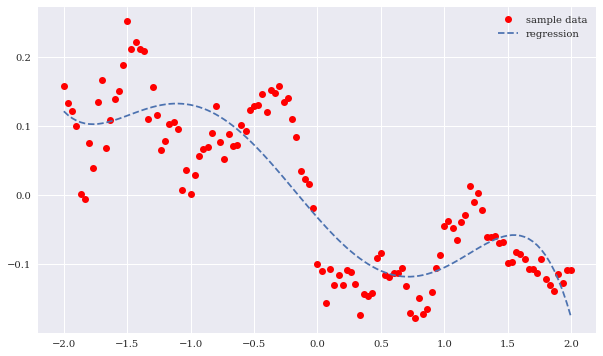

In [26]:
plt.figure(figsize = (10,6))
plt.plot(f,l,'ro',label = 'sample data')
plt.plot(f,p,'--',label = 'regression')
plt.legend();